## Guess the Coin

In [7]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Week 2 — From Discrete to Continuous Bayes

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from ipywidgets import interact, IntSlider
%matplotlib inline


plt.style.use("seaborn-v0_8")

# --- Parameters ---
# prior parameters (Beta distribution)
a_prior, b_prior = 2, 2   # "probably fair" — centered around 0.5

# --- Helper function ---
def plot_posterior(heads=0, tosses=0):
    """
    Plot prior, likelihood (up to scale), and posterior for given data.
    heads: number of observed heads
    tosses: total number of coin tosses
    """
    x = np.linspace(0, 1, 400)
    
    # prior Beta(a,b)
    prior = beta.pdf(x, a_prior, b_prior)
    
    # posterior Beta(a+a_prior, b+b_prior)
    a_post = a_prior + heads
    b_post = b_prior + tosses - heads
    posterior = beta.pdf(x, a_post, b_post)
    
    plt.figure(figsize=(7,4))
    plt.plot(x, prior, "--", label=f"Prior Beta({a_prior},{b_prior})")
    plt.plot(x, posterior, label=f"Posterior Beta({a_post},{b_post})")
    plt.fill_between(x, posterior, alpha=0.2)
    plt.xlabel("Coin bias θ (probability of heads)")
    plt.ylabel("Density")
    plt.title(f"{heads} heads out of {tosses} tosses")
    plt.legend()
    plt.show()

# --- Interactive widget ---
interact(plot_posterior,
         heads=IntSlider(min=0, max=10, step=1, value=4, description="Heads"),
         tosses=IntSlider(min=1, max=10, step=1, value=5, description="Tosses"));



interactive(children=(IntSlider(value=4, description='Heads', max=10), IntSlider(value=5, description='Tosses'…

### Mini Exercise
Play with the sliders until you find a situation where your prior and data disagree.
- Describe what happens to the posterior.
- Why doesn’t it completely ignore your prior after only a few tosses?


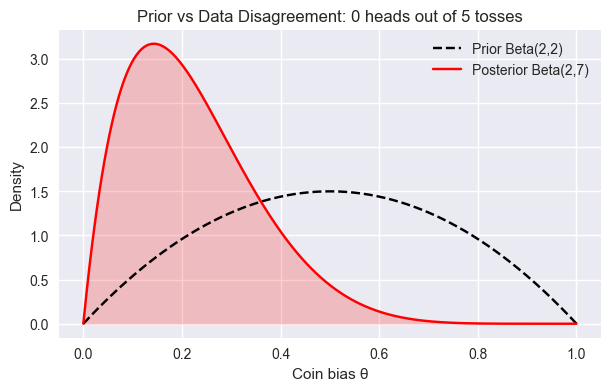

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior
a_prior, b_prior = 2, 2

# Data
heads, tosses = 0, 5

x = np.linspace(0, 1, 400)
prior = beta.pdf(x, a_prior, b_prior)
posterior = beta.pdf(x, a_prior + heads, b_prior + tosses - heads)

plt.figure(figsize=(7,4))
plt.plot(x, prior, "--", label=f"Prior Beta({a_prior},{b_prior})", color="black")
plt.plot(x, posterior, label=f"Posterior Beta({a_prior+heads},{b_prior+tosses-heads})", color="red")
plt.fill_between(x, posterior, alpha=0.2, color="red")
plt.xlabel("Coin bias θ")
plt.ylabel("Density")
plt.title(f"Prior vs Data Disagreement: {heads} heads out of {tosses} tosses")
plt.legend()
plt.show()


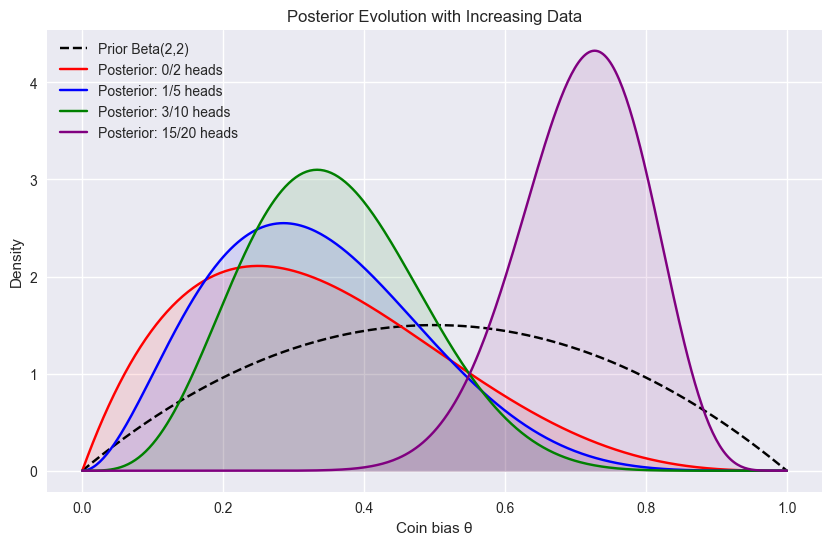

In [10]:
# Multiple data scenarios
data_scenarios = [
    {"heads": 0, "tosses": 2},
    {"heads": 1, "tosses": 5},
    {"heads": 3, "tosses": 10},
    {"heads": 15, "tosses": 20}
]

x = np.linspace(0, 1, 400)
prior = beta.pdf(x, a_prior, b_prior)

plt.figure(figsize=(10,6))
plt.plot(x, prior, "--", label=f"Prior Beta({a_prior},{b_prior})", color="black")

colors = ["red", "blue", "green", "purple"]

for i, scenario in enumerate(data_scenarios):
    a_post = a_prior + scenario["heads"]
    b_post = b_prior + scenario["tosses"] - scenario["heads"]
    posterior = beta.pdf(x, a_post, b_post)
    plt.plot(x, posterior, label=f"Posterior: {scenario['heads']}/{scenario['tosses']} heads", color=colors[i])
    plt.fill_between(x, posterior, alpha=0.1, color=colors[i])

plt.xlabel("Coin bias θ")
plt.ylabel("Density")
plt.title("Posterior Evolution with Increasing Data")
plt.legend()
plt.show()
